<IPython.core.display.Javascript object>


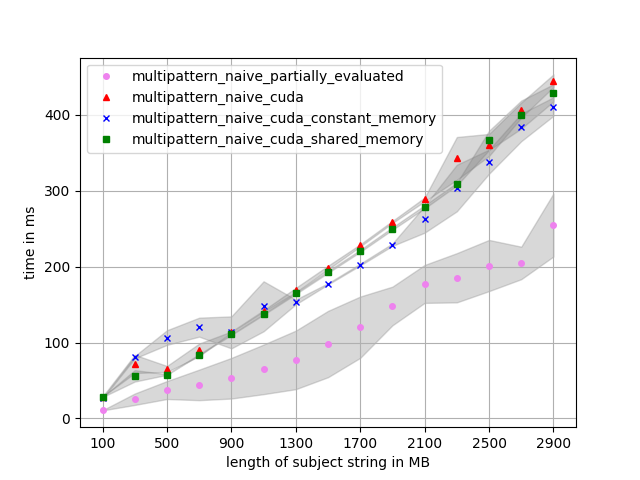

In [4]:
from functools import reduce
from IPython.display import Image
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import math
import matplotlib.ticker as plticker



def red(test_list):
    res = [0 for i in range(0,len(test_list[0]))];#12
    for i in test_list: #for each pair
        for j in range(0,len(res)):#7
            res[j]+=int(i[j])
    return list(map(lambda x : x / len(test_list) ,res))

def build_set(test_list,size):
    res = [[] for i in range(0,size)]
    for i in test_list: #for each text size
        data = red(i) #average for specific run
        for j in range(0,size):
            res[j].append(data[j])
    return res 

def deviation(test_list,avg):
    dev = [[0 for i in range(len(test_list[0][0]))] for j in range(len(test_list))] #for each size
    for i in range(len(test_list)): #for each size
        for j in range(len(test_list[i])): #for each clock
            for e in range(len(test_list[i][j])):
                dev[i][e] = dev[i][e] + (((int(test_list[i][j][e]) - avg[e][i])**2) / (len(test_list[i])-1)) #std dev
    res = [[] for i in range(len(avg))]
    for i in range(len(avg)): #for each algorithm
        for e in dev: #for each size
             res[i].append(math.sqrt(e[i]))
    return res

def deviation_float(test_list,avg):
    dev = [[0 for i in range(len(test_list[0][0]))] for j in range(len(test_list))] #for each size
    for i in range(len(test_list)): #for each size
        for j in range(len(test_list[i])): #for each clock
            for e in range(len(test_list[i][j])):
                val = float(test_list[i][j][e])
                if(val > 1 and val < 2):
                    val = val * 1000
                dev[i][e] = dev[i][e] + (((val - avg[e][i])**2) / (len(test_list[i])-1)) #std dev
    res = [[] for i in range(len(avg))]
    for i in range(len(avg)): #for each algorithm
        for e in dev: #for each size
             res[i].append(math.sqrt(e[i]))
    return res


def build_set_float(test_list,size):
    def red_(l):
        res = [0 for i in range(0,len(l[0]))];#12
        for i in l: #for each pair
            for j in range(0,len(res)):#7
                value = float(i[j])
                if(value > 1 and value < 2):
                    value = value * 1000
                res[j]+=value
        return list(map(lambda x : x / len(l) ,res))
    
    res = [[] for i in range(0,size)]
    for i in test_list: #for each text size
        data = red_(i) #average for specific run
        for j in range(0,size):
            res[j].append(data[j])
    return res


time_data = [[['50', '65', '35', '32', '99', '111', '32', '34', '2', '0', '0', '0'], ['54', '52', '44', '32', '117', '98', '32', '33', '2', '0', '0', '0'], ['75', '54', '35', '36', '100', '101', '31', '33', '2', '0', '0', '0'], ['53', '51', '35', '36', '171', '105', '32', '35', '2', '0', '0', '0'], ['48', '53', '39', '31', '104', '103', '32', '33', '2', '0', '0', '0'], ['63', '54', '34', '37', '112', '113', '32', '45', '2', '0', '0', '0'], ['62', '51', '43', '31', '102', '106', '31', '33', '2', '0', '0', '0']], [['84', '140', '111', '49', '143', '108', '42', '76', '40', '8', '8', '9'], ['85', '152', '87', '41', '116', '120', '60', '78', '40', '8', '8', '9'], ['79', '140', '76', '39', '115', '101', '49', '77', '40', '8', '8', '9'], ['77', '159', '74', '57', '130', '169', '51', '81', '40', '8', '8', '9'], ['78', '205', '137', '74', '227', '189', '45', '83', '40', '8', '8', '9'], ['93', '171', '82', '48', '115', '105', '55', '87', '41', '8', '8', '9'], ['157', '169', '92', '55', '167', '231', '51', '101', '40', '8', '8', '9']], [['92', '278', '155', '113', '241', '128', '70', '160', '104', '20', '20', '22'], ['126', '328', '171', '61', '227', '145', '64', '151', '104', '21', '20', '23'], ['130', '301', '163', '68', '207', '145', '65', '155', '104', '20', '20', '22'], ['131', '351', '155', '67', '217', '206', '105', '149', '104', '21', '20', '22'], ['150', '439', '205', '85', '202', '113', '78', '141', '104', '20', '23', '23'], ['197', '391', '199', '92', '266', '243', '83', '173', '104', '21', '20', '22'], ['182', '303', '169', '62', '216', '109', '53', '138', '104', '20', '20', '22']], [['135', '493', '239', '67', '298', '112', '105', '237', '204', '41', '40', '45'], ['188', '606', '246', '68', '281', '147', '78', '242', '210', '42', '40', '45'], ['135', '530', '259', '70', '284', '152', '71', '238', '211', '41', '40', '45'], ['157', '604', '242', '84', '282', '111', '98', '241', '208', '42', '40', '45'], ['268', '666', '231', '70', '312', '144', '71', '241', '201', '41', '40', '45'], ['162', '640', '249', '81', '274', '125', '75', '264', '207', '42', '40', '45'], ['146', '553', '244', '72', '297', '126', '77', '245', '209', '41', '40', '45']], [['178', '722', '347', '88', '405', '133', '93', '341', '315', '62', '61', '68'], ['195', '878', '341', '88', '380', '133', '93', '349', '303', '63', '61', '68'], ['179', '758', '346', '88', '378', '133', '92', '332', '310', '62', '61', '68'], ['197', '888', '346', '88', '386', '133', '93', '346', '307', '63', '61', '68'], ['185', '981', '337', '88', '381', '134', '92', '344', '306', '62', '61', '68'], ['208', '918', '341', '88', '372', '134', '94', '337', '310', '63', '61', '68'], ['189', '696', '344', '87', '388', '134', '92', '345', '317', '62', '61', '68']], [['216', '950', '423', '107', '457', '162', '113', '435', '402', '83', '81', '90'], ['245', '1128', '432', '107', '487', '158', '113', '428', '407', '84', '81', '91'], ['220', '997', '452', '106', '481', '186', '113', '441', '408', '83', '81', '91'], ['247', '1168', '449', '107', '488', '167', '114', '452', '420', '84', '81', '91'], ['232', '1297', '445', '107', '491', '154', '113', '445', '399', '83', '81', '91'], ['258', '1211', '434', '107', '461', '154', '113', '427', '385', '84', '81', '91'], ['233', '914', '436', '107', '482', '155', '113', '436', '413', '83', '81', '91']], [['301', '1404', '646', '146', '663', '199', '155', '647', '599', '125', '121', '136'], ['341', '1667', '621', '146', '699', '209', '156', '632', '575', '126', '122', '137'], ['305', '1477', '645', '146', '700', '198', '155', '639', '631', '125', '121', '136'], ['346', '1734', '645', '146', '706', '198', '156', '649', '634', '126', '122', '137'], ['326', '1925', '613', '146', '693', '198', '155', '632', '580', '125', '122', '136'], ['359', '1795', '650', '147', '692', '197', '156', '652', '621', '126', '123', '137'], ['321', '1351', '661', '147', '701', '197', '155', '646', '625', '125', '122', '136']], [['385', '1859', '828', '185', '865', '241', '197', '833', '772', '167', '162', '182'], ['439', '2211', '859', '185', '888', '241', '198', '832', '841', '168', '163', '183'], ['388', '1956', '839', '185', '883', '239', '197', '859', '790', '167', '162', '182'], ['445', '2299', '830', '186', '879', '242', '198', '814', '824', '168', '163', '183'], ['419', '2555', '857', '185', '876', '239', '198', '857', '824', '167', '162', '182'], ['460', '2382', '828', '185', '907', '240', '198', '848', '809', '168', '163', '183'], ['405', '1788', '848', '185', '885', '240', '197', '850', '798', '167', '163', '182']], [['716', '3678', '1634', '340', '1662', '412', '363', '1576', '1570', '334', '324', '363'], ['831', '4384', '1673', '341', '1722', '410', '365', '1692', '1584', '336', '326', '366'], ['726', '3871', '1667', '339', '1666', '408', '363', '1697', '1577', '334', '325', '364'], ['845', '4558', '1599', '342', '1746', '410', '366', '1621', '1506', '336', '327', '366'], ['795', '5070', '1617', '339', '1650', '406', '365', '1621', '1633', '334', '325', '364'], ['864', '4726', '1610', '341', '1691', '407', '366', '1682', '1632', '336', '327', '366'], ['752', '3535', '1543', '340', '1695', '406', '364', '1630', '1578', '335', '325', '365']], [['1050', '5498', '2440', '494', '2372', '575', '530', '2337', '2339', '500', '486', '545'], ['1222', '6558', '2503', '498', '2550', '575', '533', '2514', '2447', '504', '489', '549'], ['1062', '5788', '2309', '494', '2443', '573', '531', '2387', '2308', '501', '487', '546'], ['1241', '6820', '2482', '498', '2541', '575', '533', '2518', '2478', '504', '490', '549'], ['1171', '7586', '2386', '495', '2387', '574', '531', '2441', '2383', '502', '487', '546'], ['1265', '7066', '2216', '498', '2433', '576', '534', '2247', '2362', '504', '490', '550'], ['1098', '5282', '2455', '495', '2472', '574', '531', '2466', '2362', '502', '488', '547']], [['1383', '7320', '3234', '648', '3317', '740', '697', '3240', '3208', '667', '649', '727'], ['1612', '8731', '3063', '653', '3228', '743', '702', '3182', '3189', '672', '653', '732'], ['1397', '7704', '3263', '649', '3187', '740', '697', '3167', '3190', '668', '649', '728'], ['1638', '9082', '3177', '655', '3243', '744', '702', '3215', '3263', '673', '654', '733'], ['1546', '10105', '3077', '652', '3298', '742', '698', '3240', '3195', '669', '650', '729'], ['1670', '9408', '3193', '654', '3330', '745', '702', '3243', '3158', '673', '654', '733'], ['1442', '7030', '3237', '651', '3320', '743', '699', '3231', '3155', '670', '651', '730']], [['1712', '9134', '3873', '804', '3969', '911', '867', '3855', '3786', '837', '814', '911'], ['2000', '10902', '3504', '810', '3990', '915', '872', '3893', '3925', '842', '819', '917'], ['1734', '9618', '3664', '805', '3990', '910', '868', '3982', '4088', '838', '814', '912'], ['2037', '11342', '3737', '810', '4026', '918', '874', '3919', '3751', '843', '820', '918'], ['1922', '12620', '3709', '807', '3924', '912', '869', '3944', '3743', '839', '815', '913'], ['2071', '11752', '3981', '811', '4007', '917', '874', '3810', '3745', '844', '820', '919'], ['1791', '8804', '3903', '807', '4129', '915', '870', '3881', '3801', '840', '816', '915']], [['2044', '10962', '4538', '961', '4891', '1105', '1033', '4677', '4743', '1003', '975', '1092'], ['2393', '13078', '4762', '967', '4833', '1085', '1039', '4856', '4790', '1009', '981', '1099'], ['2072', '11554', '4673', '961', '4811', '1081', '1054', '4823', '4753', '1004', '975', '1093'], ['2443', '13602', '4524', '968', '4750', '1087', '1041', '4767', '4518', '1010', '982', '1100'], ['2320', '15164', '4671', '963', '4888', '1083', '1035', '4811', '4600', '1005', '977', '1094'], ['2497', '14097', '4632', '968', '4726', '1085', '1041', '4761', '4648', '1011', '982', '1101'], ['2157', '10525', '4666', '975', '4782', '1094', '1037', '4810', '4684', '1006', '978', '1096']], [['2732', '14600', '5632', '1277', '6366', '1408', '1374', '6320', '6134', '1331', '1293', '1450'], ['3198', '17445', '5920', '1293', '6446', '1416', '1382', '6456', '6108', '1340', '1302', '1459'], ['2755', '15409', '6014', '1288', '6404', '1411', '1376', '6324', '6192', '1332', '1295', '1451'], ['3248', '18131', '6396', '1303', '6361', '1418', '1384', '6451', '6270', '1341', '1303', '1461'], ['3063', '20181', '6125', '1276', '6423', '1417', '1379', '6262', '6318', '1334', '1297', '1453'], ['3302', '18786', '6069', '1303', '6298', '1418', '1385', '6380', '5994', '1342', '1304', '1462'], ['2844', '14023', '6261', '1291', '6305', '1411', '1379', '6349', '6263', '1336', '1298', '1455']]]

time_data_kmp = testDataKmp = [[['51', '90', '141', '2', '1'], ['55', '98', '142', '2', '1'], ['55', '89', '213', '2', '1'], ['54', '85', '140', '2', '1'], ['50', '85', '139', '2', '1'], ['59', '83', '143', '2', '1'], ['62', '95', '152', '2', '1']], [['72', '295', '141', '40', '38'], ['71', '316', '138', '40', '36'], ['68', '305', '203', '40', '39'], ['141', '324', '224', '40', '36'], ['84', '331', '198', '40', '39'], ['109', '304', '197', '40', '38'], ['109', '324', '198', '40', '38']], [['113', '665', '229', '103', '100'], ['116', '641', '230', '104', '95'], ['109', '662', '227', '103', '99'], ['117', '638', '227', '104', '95'], ['113', '675', '218', '104', '102'], ['127', '624', '219', '104', '97'], ['117', '657', '232', '103', '99']], [['160', '1237', '298', '208', '202'], ['161', '1194', '293', '211', '191'], ['150', '1249', '306', '203', '199'], ['147', '1170', '265', '205', '194'], ['148', '1278', '394', '209', '205'], ['190', '1206', '303', '206', '196'], ['171', '1244', '324', '209', '202']], [['208', '1837', '429', '305', '305'], ['234', '1804', '425', '311', '281'], ['203', '1807', '369', '315', '302'], ['210', '1729', '333', '319', '288'], ['246', '1938', '508', '313', '309'], ['353', '1774', '550', '317', '295'], ['190', '1796', '340', '316', '301']], [['316', '2457', '1035', '405', '402'], ['322', '2456', '531', '411', '385'], ['369', '2427', '523', '420', '397'], ['360', '2328', '495', '418', '387'], ['273', '2501', '583', '405', '410'], ['282', '2363', '431', '415', '391'], ['355', '2456', '655', '413', '396']], [['303', '3580', '630', '604', '609'], ['360', '3528', '560', '600', '562'], ['328', '3623', '747', '611', '605'], ['374', '3416', '609', '600', '566'], ['352', '3673', '654', '611', '614'], ['412', '3362', '574', '613', '591'], ['414', '3611', '584', '627', '599']], [['402', '4777', '742', '811', '797'], ['452', '4628', '704', '819', '753'], ['400', '4801', '765', '839', '812'], ['474', '4567', '732', '784', '763'], ['452', '4818', '719', '779', '818'], ['487', '4455', '713', '803', '772'], ['408', '4704', '723', '845', '791']], [['713', '9460', '1351', '1546', '1608'], ['852', '9093', '1280', '1621', '1525'], ['744', '9413', '1513', '1611', '1597'], ['911', '8961', '1288', '1619', '1526'], ['810', '9555', '1394', '1617', '1621'], ['888', '8895', '1346', '1570', '1559'], ['764', '9352', '1329', '1566', '1598']], [['1207', '14113', '2133', '2317', '2407'], ['1232', '13650', '1912', '2390', '2259'], ['1079', '14118', '2014', '2315', '2403'], ['1257', '13420', '1999', '2315', '2116'], ['1207', '14314', '2000', '2425', '2428'], ['1282', '13260', '1889', '2375', '2326'], ['1098', '14002', '2014', '2349', '2386']], [['1429', '18824', '2676', '3093', '3199'], ['1633', '18113', '2523', '3057', '3046'], ['1406', '18764', '2618', '3073', '3190'], ['1663', '17871', '2590', '3181', '3053'], ['1608', '19080', '2589', '3133', '3247'], ['1695', '17651', '2494', '3298', '3083'], ['1448', '18655', '2593', '3313', '3175']], [['1848', '23516', '3305', '3770', '3993'], ['2032', '22607', '3160', '4018', '3803'], ['1756', '23496', '3338', '3663', '4009'], ['2122', '22333', '3076', '4033', '3796'], ['1962', '23841', '3215', '3606', '4046'], ['2095', '22068', '3080', '3956', '3895'], ['1861', '23332', '3267', '4056', '4007']], [['2114', '28195', '4065', '4714', '4794'], ['2522', '27130', '3698', '4471', '4414'], ['2184', '28163', '3976', '4474', '4796'], ['2485', '26868', '3830', '4533', '4475'], ['2312', '28599', '3994', '4540', '4850'], ['2579', '26572', '3751', '4615', '4625'], ['2231', '28065', '3875', '4650', '4774']], [['2848', '37610', '5145', '5944', '6405'], ['3237', '36236', '5531', '6352', '6054'], ['2797', '37458', '5001', '6338', '6404'], ['3276', '35756', '4780', '6320', '5923'], ['3084', '38034', '5099', '6171', '6481'], ['3342', '35352', '4923', '5967', '6209'], ['2856', '37259', '5029', '5973', '6363']]]

testDataNaivePe = [[['507', '41', '40'], ['113', '42', '40'], ['106', '41', '40'], ['68', '42', '40'], ['70', '41', '40'], ['72', '42', '40'], ['76', '42', '41']], [['120', '62', '61'], ['113', '63', '61'], ['93', '62', '61'], ['95', '63', '61'], ['94', '63', '61'], ['95', '63', '61'], ['92', '63', '61']], [['115', '83', '81'], ['111', '84', '81'], ['111', '83', '81'], ['107', '84', '81'], ['106', '83', '81'], ['109', '84', '81'], ['118', '83', '81']], [['146', '125', '121'], ['146', '126', '122'], ['146', '125', '121'], ['147', '126', '122'], ['161', '125', '122'], ['171', '126', '122'], ['151', '125', '122']], [['212', '167', '162'], ['204', '168', '163'], ['246', '167', '162'], ['211', '168', '163'], ['203', '168', '163'], ['261', '168', '163'], ['199', '167', '163']], [['371', '334', '325'], ['427', '336', '326'], ['354', '334', '325'], ['409', '336', '327'], ['366', '335', '325'], ['440', '337', '327'], ['380', '335', '326']], [['532', '501', '487'], ['516', '504', '489'], ['682', '501', '487'], ['522', '504', '490'], ['507', '502', '488'], ['513', '505', '490'], ['577', '502', '488']], [['847', '668', '649'], ['666', '672', '653'], ['663', '668', '649'], ['669', '673', '654'], ['663', '669', '650'], ['669', '673', '654'], ['667', '670', '651']], [['820', '837', '814'], ['886', '843', '819'], ['834', '838', '815'], ['905', '844', '820'], ['894', '839', '816'], ['886', '844', '820'], ['826', '840', '816']], [['997', '1003', '975'], ['1199', '1009', '981'], ['1020', '1004', '976'], ['1108', '1011', '982'], ['982', '1005', '977'], ['999', '1011', '983'], ['1012', '1007', '978']], [['1284', '1331', '1294'], ['1315', '1339', '1301'], ['1296', '1332', '1295'], ['1349', '1341', '1304'], ['1321', '1334', '1296'], ['1310', '1342', '1304'], ['1277', '1336', '1298']], [['1445', '1501', '1459'], ['1452', '1510', '1468'], ['1449', '1503', '1460'], ['1508', '1513', '1470'], ['1454', '1505', '1463'], ['1449', '1513', '1471'], ['1447', '1506', '1464']]]
short_pats = [[['127', '44', '43'], ['113', '44', '43'], ['103', '44', '43'], ['98', '44', '43'], ['81', '44', '43'], ['86', '44', '43'], ['78', '44', '43']], [['102', '66', '64'], ['121', '66', '65'], ['112', '66', '64'], ['100', '66', '65'], ['97', '66', '65'], ['97', '66', '65'], ['100', '66', '65']], [['129', '87', '86'], ['146', '88', '86'], ['152', '87', '86'], ['190', '88', '87'], ['140', '88', '86'], ['121', '88', '87'], ['115', '88', '86']], [['161', '131', '129'], ['156', '132', '130'], ['159', '132', '129'], ['177', '132', '130'], ['162', '132', '129'], ['157', '132', '130'], ['156', '132', '129']], [['198', '175', '172'], ['200', '176', '173'], ['197', '175', '173'], ['198', '176', '173'], ['198', '176', '173'], ['198', '176', '174'], ['198', '176', '173']], [['373', '349', '345'], ['366', '352', '346'], ['367', '350', '345'], ['368', '352', '347'], ['366', '350', '345'], ['380', '352', '347'], ['382', '351', '346']], [['535', '525', '516'], ['535', '528', '520'], ['544', '525', '517'], ['546', '529', '520'], ['540', '526', '518'], ['577', '529', '520'], ['557', '527', '518']], [['721', '700', '689'], ['703', '704', '693'], ['704', '701', '690'], ['707', '705', '694'], ['713', '702', '691'], ['712', '705', '694'], ['706', '702', '691']], [['870', '878', '864'], ['882', '883', '869'], ['874', '879', '865'], ['901', '884', '870'], ['874', '880', '866'], ['879', '885', '870'], ['873', '881', '866']], [['1037', '1053', '1035'], ['1042', '1059', '1041'], ['1044', '1054', '1036'], ['1063', '1060', '1042'], ['1042', '1055', '1037'], ['1049', '1061', '1043'], ['1044', '1056', '1038']], [['1399', '1405', '1374'], ['1382', '1414', '1382'], ['1393', '1407', '1376'], ['1385', '1416', '1384'], ['1394', '1408', '1377'], ['1394', '1416', '1385'], ['1376', '1410', '1378']], [['1558', '1577', '1549'], ['1562', '1587', '1558'], ['1554', '1579', '1551'], ['1565', '1589', '1560'], ['1572', '1581', '1553'], ['1570', '1590', '1561'], ['1557', '1583', '1554']]]
real_data = [[['84', '50', '50'], ['95', '50', '50'], ['83', '51', '51'], ['87', '53', '53'], ['87', '53', '52'], ['98', '51', '50'], ['95', '50', '50'], ['87', '52', '52'], ['84', '51', '50'], ['83', '50', '50'], ['88', '54', '54'], ['86', '50', '49'], ['96', '50', '50'], ['111', '50', '50'], ['90', '52', '52'], ['94', '52', '52'], ['96', '58', '57'], ['87', '52', '52'], ['95', '52', '52'], ['101', '52', '52'], ['95', '53', '52']], [['118', '75', '75'], ['158', '75', '75'], ['108', '77', '76'], ['109', '79', '78'], ['109', '79', '78'], ['132', '76', '76'], ['109', '76', '75'], ['111', '78', '77'], ['110', '76', '76'], ['108', '75', '75'], ['114', '81', '80'], ['109', '75', '74'], ['112', '75', '74'], ['109', '75', '75'], ['111', '78', '77'], ['112', '77', '77'], ['120', '84', '84'], ['111', '78', '77'], ['111', '78', '78'], ['112', '78', '78'], ['111', '79', '78']], [['133', '100', '99'], ['144', '100', '100'], ['134', '102', '101'], ['139', '105', '104'], ['138', '105', '104'], ['134', '102', '102'], ['134', '101', '100'], ['136', '104', '103'], ['136', '102', '101'], ['156', '100', '100'], ['140', '107', '106'], ['136', '99', '99'], ['135', '100', '99'], ['134', '100', '100'], ['136', '103', '102'], ['139', '103', '102'], ['145', '111', '110'], ['136', '104', '103'], ['137', '105', '104'], ['140', '104', '104'], ['137', '105', '104']], [['185', '150', '149'], ['185', '150', '149'], ['186', '152', '151'], ['189', '156', '155'], ['189', '157', '156'], ['188', '153', '152'], ['207', '151', '150'], ['189', '155', '154'], ['189', '153', '152'], ['191', '150', '149'], ['214', '160', '159'], ['187', '149', '148'], ['187', '150', '149'], ['190', '151', '150'], ['188', '153', '152'], ['189', '223', '46'], ['84', '51', '50'], ['79', '48', '47'], ['79', '49', '48'], ['79', '49', '48'], ['79', '49', '48']], [['91', '60', '60'], ['90', '61', '60'], ['92', '62', '62'], ['94', '65', '64'], ['94', '66', '65'], ['91', '61', '61'], ['92', '61', '60'], ['93', '65', '64'], ['93', '63', '62'], ['91', '61', '60'], ['96', '67', '66'], ['91', '60', '59'], ['93', '60', '60'], ['92', '61', '60'], ['93', '63', '62'], ['95', '63', '62'], ['99', '67', '66'], ['95', '64', '63'], ['95', '65', '64'], ['95', '65', '64'], ['94', '65', '65']], [['152', '121', '119'], ['151', '122', '121'], ['154', '125', '124'], ['162', '128', '127'], ['160', '131', '129'], ['154', '122', '121'], ['153', '121', '120'], ['157', '129', '127'], ['158', '126', '125'], ['173', '121', '120'], ['163', '133', '132'], ['151', '120', '118'], ['154', '120', '119'], ['153', '122', '120'], ['157', '124', '123'], ['157', '125', '123'], ['165', '134', '133'], ['159', '128', '126'], ['187', '130', '129'], ['161', '130', '129'], ['185', '131', '129']], [['237', '182', '181'], ['245', '185', '182'], ['249', '189', '187'], ['256', '193', '191'], ['260', '197', '194'], ['249', '185', '183'], ['250', '183', '181'], ['241', '194', '191'], ['222', '190', '188'], ['240', '183', '181'], ['267', '200', '198'], ['258', '181', '179'], ['282', '181', '179'], ['215', '184', '182'], ['243', '187', '185'], ['243', '188', '185'], ['255', '201', '199'], ['223', '192', '190'], ['226', '196', '194'], ['225', '196', '193'], ['224', '197', '194']], [['299', '243', '241'], ['313', '247', '244'], ['316', '252', '249'], ['313', '258', '255'], ['317', '262', '259'], ['309', '247', '245'], ['303', '244', '242'], ['316', '259', '255'], ['314', '253', '251'], ['313', '244', '242'], ['325', '267', '263'], ['315', '241', '239'], ['302', '242', '240'], ['277', '245', '243'], ['313', '249', '247'], ['312', '249', '247'], ['326', '269', '266'], ['286', '256', '253'], ['292', '262', '259'], ['296', '262', '259'], ['289', '261', '259']], [['358', '305', '302'], ['399', '309', '305'], ['370', '316', '311'], ['405', '323', '318'], ['389', '328', '324'], ['357', '310', '307'], ['366', '306', '303'], ['350', '324', '319'], ['383', '318', '314'], ['408', '306', '303'], ['385', '333', '329'], ['394', '303', '299'], ['376', '304', '301'], ['346', '308', '304'], ['382', '312', '308'], ['365', '312', '308'], ['430', '335', '330'], ['350', '319', '315'], ['406', '328', '323'], ['356', '327', '323'], ['352', '326', '323']], [['447', '366', '362'], ['450', '371', '366'], ['455', '379', '373'], ['441', '386', '381'], ['458', '393', '387'], ['427', '371', '367'], ['423', '367', '363'], ['437', '387', '382'], ['435', '381', '376'], ['416', '367', '363'], ['463', '400', '394'], ['433', '363', '359'], ['417', '365', '361'], ['435', '370', '366'], ['442', '374', '369'], ['436', '374', '369'], ['461', '399', '394'], ['414', '383', '378'], ['421', '392', '387'], ['420', '392', '387'], ['417', '391', '386']], [['572', '490', '480'], ['611', '497', '487'], ['739', '506', '495'], ['586', '516', '506'], ['607', '526', '514'], ['566', '498', '488'], ['567', '492', '482'], ['583', '518', '507'], ['595', '510', '499'], ['569', '492', '482'], ['616', '534', '523'], ['558', '486', '477'], ['567', '488', '479'], ['562', '495', '485'], ['574', '500', '490'], ['553', '500', '490'], ['595', '534', '523'], ['539', '512', '501'], ['550', '525', '514'], ['549', '525', '513'], ['544', '524', '513']], [['611', '551', '543'], ['627', '558', '550'], ['681', '568', '559'], ['650', '580', '572'], ['645', '591', '582'], ['620', '560', '552'], ['594', '553', '546'], ['657', '582', '573'], ['650', '573', '565'], ['631', '553', '546'], ['680', '600', '591'], ['608', '546', '539'], ['644', '549', '542'], ['607', '556', '548'], ['625', '562', '553'], ['618', '562', '554'], ['654', '600', '591'], ['603', '575', '566'], ['617', '590', '581'], ['618', '590', '581'], ['609', '588', '579']]]
pats_160 = [[['109', '48', '48'], ['99', '48', '48'], ['102', '48', '48'], ['106', '48', '48'], ['114', '48', '48'], ['98', '48', '48'], ['115', '48', '48'], ['114', '66', '66'], ['102', '48', '48'], ['100', '48', '48']], [['125', '72', '72'], ['126', '72', '72'], ['128', '72', '72'], ['125', '72', '72'], ['127', '72', '72'], ['125', '72', '72'], ['122', '72', '72'], ['144', '99', '99'], ['123', '72', '72'], ['122', '72', '72']], [['162', '96', '96'], ['148', '96', '96'], ['151', '96', '96'], ['194', '96', '96'], ['147', '96', '96'], ['149', '96', '96'], ['148', '96', '96'], ['175', '132', '132'], ['147', '96', '96'], ['148', '96', '96']], [['202', '144', '143'], ['199', '144', '143'], ['198', '144', '143'], ['213', '144', '143'], ['200', '144', '143'], ['197', '144', '143'], ['199', '144', '143'], ['245', '198', '199'], ['200', '144', '143'], ['201', '144', '143']], [['264', '192', '191'], ['253', '192', '191'], ['249', '192', '191'], ['271', '192', '191'], ['247', '192', '191'], ['247', '192', '191'], ['250', '192', '191'], ['303', '264', '265'], ['247', '192', '191'], ['247', '192', '191']], [['453', '384', '383'], ['448', '384', '383'], ['449', '384', '383'], ['451', '384', '383'], ['446', '384', '383'], ['450', '384', '383'], ['450', '384', '383'], ['565', '528', '530'], ['449', '384', '383'], ['451', '384', '383']], [['647', '576', '574'], ['646', '576', '574'], ['652', '576', '574'], ['648', '576', '574'], ['672', '576', '574'], ['651', '576', '574'], ['655', '576', '574'], ['812', '792', '795'], ['646', '576', '574'], ['647', '576', '574']], [['859', '769', '766'], ['850', '769', '766'], ['848', '769', '766'], ['850', '769', '766'], ['849', '769', '766'], ['845', '769', '766'], ['856', '769', '766'], ['1066', '1056', '1060'], ['883', '769', '766'], ['876', '769', '766']], [['1051', '960', '957'], ['1053', '960', '957'], ['1066', '960', '957'], ['1074', '960', '957'], ['1126', '960', '957'], ['1052', '960', '957'], ['1063', '960', '957'], ['1348', '1320', '1325'], ['1067', '960', '957'], ['1058', '960', '957']], [['1281', '1153', '1149'], ['1249', '1153', '1149'], ['1256', '1153', '1149'], ['1257', '1153', '1149'], ['1259', '1153', '1149'], ['1260', '1153', '1149'], ['1260', '1153', '1148'], ['1594', '1584', '1590'], ['1255', '1153', '1149'], ['1257', '1153', '1149']], [['1678', '1538', '1532'], ['1648', '1538', '1532'], ['1648', '1538', '1532'], ['1653', '1538', '1532'], ['1748', '1538', '1532'], ['1723', '1538', '1532'], ['1655', '1538', '1532'], ['2220', '2113', '2120'], ['1696', '1538', '1532'], ['1666', '1538', '1532']], [['1905', '1730', '1723'], ['1883', '1729', '1723'], ['1866', '1729', '1723'], ['1841', '1730', '1723'], ['1869', '1729', '1723'], ['1858', '1729', '1723'], ['1883', '1729', '1723'], ['2375', '2376', '2385'], ['1898', '1729', '1723'], ['1857', '1730', '1723']]]
pats_8 = [[['83', '40', '39'], ['80', '40', '40'], ['80', '40', '39'], ['84', '41', '40'], ['86', '40', '40'], ['80', '40', '40'], ['76', '40', '40'], ['79', '40', '40'], ['79', '40', '40'], ['82', '40', '40']], [['95', '60', '59'], ['98', '61', '60'], ['94', '60', '59'], ['96', '61', '60'], ['122', '61', '60'], ['119', '61', '60'], ['101', '61', '60'], ['99', '61', '60'], ['96', '61', '60'], ['101', '61', '60']], [['143', '80', '79'], ['125', '81', '80'], ['155', '80', '79'], ['147', '81', '80'], ['146', '81', '80'], ['121', '81', '80'], ['120', '81', '80'], ['119', '81', '80'], ['119', '81', '80'], ['130', '81', '80']], [['163', '121', '119'], ['160', '122', '120'], ['159', '120', '118'], ['159', '122', '121'], ['162', '122', '120'], ['161', '122', '120'], ['165', '122', '120'], ['161', '122', '120'], ['175', '122', '120'], ['166', '122', '121']], [['203', '161', '159'], ['222', '162', '161'], ['207', '160', '158'], ['199', '163', '161'], ['192', '162', '160'], ['197', '162', '160'], ['201', '162', '160'], ['196', '162', '161'], ['205', '162', '160'], ['211', '163', '161']], [['355', '321', '318'], ['354', '324', '321'], ['345', '319', '316'], ['354', '326', '323'], ['366', '324', '321'], ['350', '324', '321'], ['356', '324', '321'], ['352', '324', '322'], ['430', '324', '321'], ['358', '325', '322']], [['516', '483', '476'], ['510', '487', '481'], ['497', '480', '473'], ['528', '489', '483'], ['505', '487', '480'], ['535', '486', '480'], ['565', '488', '480'], ['511', '488', '482'], ['513', '487', '481'], ['533', '489', '482']], [['675', '644', '635'], ['675', '650', '642'], ['663', '640', '632'], ['659', '653', '645'], ['693', '649', '641'], ['660', '649', '641'], ['657', '649', '641'], ['662', '650', '642'], ['677', '650', '641'], ['677', '652', '644']], [['826', '807', '797'], ['832', '815', '806'], ['810', '802', '792'], ['830', '817', '809'], ['836', '814', '804'], ['828', '813', '804'], ['835', '814', '804'], ['836', '815', '806'], ['825', '814', '804'], ['834', '817', '807']], [['972', '968', '954'], ['974', '977', '965'], ['957', '962', '948'], ['973', '980', '968'], ['969', '975', '962'], ['969', '975', '963'], ['970', '976', '963'], ['973', '977', '965'], ['972', '976', '963'], ['972', '979', '967']], [['1259', '1292', '1267'], ['1275', '1304', '1281'], ['1252', '1283', '1259'], ['1286', '1308', '1286'], ['1273', '1302', '1278'], ['1273', '1301', '1278'], ['1284', '1302', '1278'], ['1275', '1304', '1281'], ['1271', '1303', '1279'], ['1276', '1307', '1283']], [['1490', '1452', '1429'], ['1576', '1465', '1445'], ['1660', '1442', '1420'], ['1425', '1470', '1450'], ['1420', '1463', '1441'], ['1417', '1462', '1441'], ['1420', '1463', '1441'], ['1422', '1466', '1445'], ['1422', '1464', '1442'], ['1427', '1469', '1447']]]
pats_12 = [[['72', '44', '43'], ['72', '44', '43'], ['73', '43', '43'], ['73', '44', '43'], ['73', '44', '43'], ['79', '44', '43'], ['72', '44', '43'], ['72', '44', '43'], ['73', '44', '43'], ['73', '43', '43']], [['95', '66', '65'], ['118', '66', '65'], ['96', '65', '64'], ['95', '66', '65'], ['113', '66', '64'], ['95', '66', '64'], ['93', '66', '65'], ['93', '66', '65'], ['95', '66', '65'], ['93', '65', '64']], [['122', '88', '86'], ['114', '87', '86'], ['113', '87', '86'], ['114', '88', '86'], ['114', '87', '86'], ['126', '87', '86'], ['126', '88', '86'], ['127', '88', '86'], ['120', '88', '86'], ['129', '87', '86']], [['158', '132', '129'], ['157', '131', '129'], ['156', '131', '129'], ['161', '132', '130'], ['155', '131', '129'], ['156', '131', '129'], ['156', '132', '129'], ['156', '132', '129'], ['156', '132', '129'], ['155', '131', '129']], [['198', '176', '173'], ['197', '175', '173'], ['205', '175', '172'], ['200', '176', '173'], ['201', '175', '172'], ['197', '175', '172'], ['198', '175', '173'], ['198', '175', '173'], ['199', '176', '173'], ['197', '175', '172']], [['367', '350', '345'], ['385', '350', '345'], ['368', '349', '343'], ['368', '352', '347'], ['365', '350', '345'], ['368', '350', '344'], ['388', '350', '345'], ['369', '351', '345'], ['366', '351', '345'], ['364', '349', '343']], [['540', '526', '517'], ['579', '526', '517'], ['570', '524', '515'], ['538', '528', '519'], ['542', '525', '516'], ['545', '525', '516'], ['542', '527', '518'], ['601', '527', '518'], ['547', '527', '518'], ['555', '524', '515']], [['711', '702', '691'], ['703', '701', '690'], ['698', '699', '687'], ['706', '704', '693'], ['702', '701', '689'], ['704', '700', '689'], ['704', '702', '691'], ['703', '702', '691'], ['706', '702', '691'], ['711', '699', '687']], [['870', '880', '865'], ['872', '879', '865'], ['868', '876', '861'], ['910', '883', '869'], ['869', '879', '864'], ['871', '878', '863'], ['878', '881', '866'], ['871', '881', '866'], ['873', '881', '866'], ['873', '876', '861']], [['1044', '1055', '1037'], ['1042', '1054', '1036'], ['1038', '1051', '1031'], ['1049', '1059', '1041'], ['1055', '1054', '1035'], ['1042', '1053', '1034'], ['1042', '1056', '1037'], ['1042', '1056', '1037'], ['1045', '1056', '1037'], ['1042', '1051', '1032']], [['1499', '1409', '1377'], ['1427', '1407', '1376'], ['1377', '1403', '1370'], ['1374', '1414', '1382'], ['1368', '1406', '1374'], ['1368', '1406', '1373'], ['1409', '1410', '1378'], ['1371', '1410', '1378'], ['1370', '1410', '1378'], ['1363', '1403', '1370']], [['1561', '1582', '1552'], ['1578', '1579', '1551'], ['1530', '1575', '1544'], ['1543', '1587', '1558'], ['1536', '1579', '1549'], ['1536', '1578', '1548'], ['1540', '1583', '1553'], ['1541', '1582', '1553'], ['1541', '1583', '1553'], ['1583', '1575', '1544']]]
pats_16 = [[['74', '44', '43'], ['76', '44', '43'], ['75', '44', '43'], ['76', '44', '43'], ['76', '44', '43'], ['80', '44', '43'], ['78', '44', '44'], ['76', '44', '44'], ['75', '44', '43'], ['76', '44', '43']], [['98', '66', '65'], ['98', '67', '65'], ['99', '66', '65'], ['98', '67', '66'], ['101', '67', '66'], ['103', '67', '66'], ['103', '67', '66'], ['102', '67', '66'], ['102', '67', '66'], ['101', '67', '66']], [['122', '88', '86'], ['123', '89', '87'], ['123', '88', '87'], ['122', '89', '87'], ['122', '89', '87'], ['123', '89', '87'], ['163', '91', '87'], ['163', '89', '87'], ['156', '89', '87'], ['126', '89', '87']], [['171', '132', '130'], ['163', '133', '131'], ['157', '133', '131'], ['190', '134', '131'], ['163', '134', '131'], ['157', '133', '131'], ['166', '134', '131'], ['163', '134', '131'], ['181', '134', '131'], ['166', '134', '131']], [['198', '176', '173'], ['199', '178', '175'], ['199', '177', '174'], ['199', '178', '175'], ['200', '178', '175'], ['199', '178', '175'], ['199', '178', '175'], ['200', '178', '176'], ['200', '178', '175'], ['199', '178', '175']], [['365', '351', '347'], ['370', '354', '349'], ['371', '353', '349'], ['368', '355', '350'], ['370', '355', '350'], ['371', '355', '350'], ['369', '355', '350'], ['373', '356', '351'], ['369', '355', '351'], ['369', '356', '351']], [['532', '528', '519'], ['539', '532', '524'], ['591', '531', '523'], ['538', '534', '525'], ['557', '534', '525'], ['539', '534', '525'], ['538', '533', '525'], ['565', '534', '526'], ['538', '534', '526'], ['552', '534', '526']], [['725', '704', '693'], ['708', '710', '699'], ['704', '708', '697'], ['740', '712', '701'], ['762', '712', '701'], ['710', '712', '701'], ['710', '711', '701'], ['710', '712', '701'], ['710', '712', '701'], ['715', '712', '701']], [['871', '883', '868'], ['890', '890', '875'], ['879', '888', '874'], ['885', '892', '878'], ['881', '893', '878'], ['881', '893', '878'], ['886', '892', '878'], ['880', '893', '879'], ['893', '893', '879'], ['881', '893', '879']], [['1057', '1059', '1041'], ['1044', '1068', '1049'], ['1043', '1065', '1047'], ['1049', '1070', '1052'], ['1050', '1071', '1052'], ['1050', '1071', '1052'], ['1057', '1070', '1052'], ['1050', '1071', '1053'], ['1050', '1071', '1053'], ['1051', '1071', '1053']], [['1407', '1414', '1382'], ['1375', '1425', '1394'], ['1375', '1422', '1391'], ['1430', '1428', '1398'], ['1389', '1429', '1398'], ['1388', '1429', '1398'], ['1429', '1428', '1398'], ['1389', '1430', '1399'], ['1391', '1430', '1399'], ['1389', '1430', '1399']], [['1651', '1586', '1558'], ['1574', '1600', '1571'], ['1542', '1596', '1568'], ['1556', '1603', '1576'], ['1553', '1604', '1576'], ['1553', '1604', '1576'], ['1553', '1603', '1575'], ['1680', '1605', '1577'], ['1586', '1605', '1577'], ['1807', '1605', '1577']]]

kmp_pats8 = [[['130', '37', '200', '146'], ['123', '38', '207', '153'], ['161', '37', '201', '161'], ['154', '37', '196', '167'], ['238', '37', '199', '153'], ['251', '37', '198', '169'], ['201', '37', '188', '169'], ['143', '37', '204', '172'], ['121', '37', '207', '145'], ['149', '37', '192', '154']], [['171', '56', '302', '242'], ['161', '56', '312', '211'], ['208', '56', '304', '236'], ['192', '56', '294', '229'], ['356', '56', '299', '251'], ['346', '56', '298', '242'], ['248', '55', '282', '231'], ['187', '56', '307', '218'], ['173', '56', '313', '225'], ['217', '55', '288', '247']], [['253', '75', '402', '297'], ['220', '75', '413', '261'], ['219', '75', '402', '268'], ['265', '75', '390', '294'], ['478', '75', '397', '278'], ['470', '75', '398', '310'], ['328', '74', '377', '240'], ['254', '75', '408', '237'], ['248', '75', '412', '266'], ['283', '74', '384', '273']], [['372', '113', '607', '345'], ['321', '113', '626', '404'], ['333', '113', '607', '396'], ['368', '113', '590', '311'], ['669', '113', '601', '354'], ['636', '112', '602', '390'], ['424', '111', '576', '363'], ['300', '112', '617', '389'], ['280', '113', '621', '319'], ['309', '111', '577', '369']], [['387', '150', '808', '413'], ['377', '151', '829', '367'], ['388', '150', '813', '427'], ['428', '151', '786', '357'], ['830', '150', '800', '393'], ['814', '150', '805', '408'], ['586', '148', '761', '436'], ['416', '150', '824', '388'], ['415', '151', '829', '442'], ['452', '148', '778', '480']], [['726', '301', '1616', '823'], ['705', '302', '1667', '646'], ['755', '301', '1656', '632'], ['776', '301', '1579', '718'], ['1603', '300', '1601', '671'], ['1572', '300', '1610', '623'], ['1087', '296', '1538', '714'], ['701', '300', '1643', '669'], ['690', '302', '1660', '770'], ['719', '295', '1554', '761']], [['1081', '452', '2481', '1056'], ['1004', '455', '2545', '986'], ['1058', '452', '2445', '973'], ['1124', '452', '2383', '1006'], ['2400', '451', '2428', '962'], ['2375', '451', '2420', '967'], ['1592', '444', '2327', '991'], ['1041', '451', '2478', '1013'], ['982', '453', '2507', '1046'], ['1112', '444', '2336', '1069']], [['1443', '603', '3291', '1170'], ['1347', '607', '3316', '1273'], ['1419', '603', '3285', '1238'], ['1500', '603', '3193', '1192'], ['3158', '602', '3311', '1421'], ['3063', '601', '3214', '1231'], ['2035', '593', '3090', '1180'], ['1391', '601', '3388', '1379'], ['1384', '604', '3319', '1113'], ['1442', '592', '3121', '1242']], [['1747', '755', '4158', '1479'], ['1649', '759', '4165', '1371'], ['1732', '754', '4135', '1555'], ['1835', '755', '4060', '1619'], ['3875', '753', '4066', '1450'], ['3907', '752', '4046', '1511'], ['2639', '742', '3904', '1635'], ['1692', '752', '4208', '1479'], ['1615', '757', '4175', '1773'], ['1714', '741', '3959', '1668']], [['2089', '905', '4911', '1930'], ['1994', '911', '4994', '1942'], ['2080', '905', '4940', '1754'], ['2231', '905', '4843', '1763'], ['4639', '904', '4865', '1874'], ['4549', '902', '4822', '1736'], ['3086', '890', '4645', '1869'], ['1988', '902', '5072', '1745'], ['1943', '907', '5003', '1711'], ['2024', '889', '4767', '1809']], [['2843', '1208', '6653', '2541'], ['2658', '1215', '6684', '2254'], ['2747', '1207', '6554', '2243'], ['2941', '1208', '6399', '2303'], ['6985', '1207', '6581', '2294'], ['6037', '1205', '6509', '2373'], ['4198', '1188', '6239', '2374'], ['2693', '1205', '6760', '2406'], ['2599', '1212', '6761', '2379'], ['2731', '1186', '6354', '2419']], [['3158', '1360', '7444', '2786'], ['2949', '1369', '7612', '2665'], ['3260', '1359', '7524', '2574'], ['3289', '1361', '7248', '2875'], ['6960', '1358', '7393', '2576'], ['7005', '1356', '7272', '2605'], ['4689', '1337', '7012', '2962'], ['2971', '1365', '7596', '2605'], ['2920', '1368', '7649', '2715'], ['3058', '1338', '7061', '2700']]]

multipattern256 = [[['119', '199', '177']], [['308', '299', '266']], [['191', '398', '354']], [['210', '597', '532']], [['264', '798', '711']], [['505', '1588', '1415']], [['665', '2385', '2125']], [['814', '3164', '2818']], [['988', '3954', '3522']], [['1183', '4760', '4240']], [['1552', '6345', '5650']], [['1776', '7132', '6351']]]

multipattern512 = [[['115', '199', '178']], [['147', '299', '268']], [['168', '398', '358']], [['230', '598', '537']], [['299', '799', '718']], [['453', '1591', '1429']], [['633', '2389', '2145']], [['850', '3169', '2845']], [['1008', '3962', '3556']], [['1253', '4767', '4280']], [['1598', '6355', '5703']], [['1783', '7142', '6411']]]
multipattern1024 = [[['116', '197', '179']], [['139', '296', '269']], [['164', '394', '358']], [['244', '591', '538']], [['269', '790', '719']], [['471', '1573', '1431']], [['662', '2362', '2148']], [['857', '3134', '2849']], [['1105', '3915', '3562']], [['1257', '4714', '4286']], [['1650', '6284', '5711']], [['1863', '7062', '6420']]]

multipattern_gen = [[['352', '507', '489'], ['300', '503', '485'], ['297', '509', '491'], ['299', '504', '485'], ['300', '507', '489'], ['305', '503', '484'], ['312', '509', '491'], ['309', '507', '488'], ['327', '505', '487'], ['309', '504', '485']], [['407', '761', '733'], ['433', '755', '728'], ['456', '764', '737'], ['447', '756', '728'], ['459', '761', '734'], ['410', '754', '727'], ['464', '765', '737'], ['485', '760', '733'], ['408', '758', '730'], ['420', '756', '728']], [['543', '1015', '978'], ['591', '1007', '971'], ['582', '1019', '982'], ['592', '1008', '972'], ['632', '1015', '979'], ['617', '1006', '969'], ['596', '1020', '983'], ['605', '1014', '978'], ['661', '1010', '974'], ['546', '1008', '971']], [['762', '1523', '1468'], ['768', '1512', '1456'], ['791', '1529', '1474'], ['760', '1513', '1458'], ['764', '1523', '1468'], ['756', '1509', '1454'], ['768', '1530', '1477'], ['794', '1522', '1467'], ['766', '1516', '1462'], ['834', '1513', '1457']], [['985', '2030', '1958'], ['991', '2016', '1942'], ['1001', '2039', '1966'], ['996', '2018', '1945'], ['989', '2032', '1958'], ['1014', '2013', '1940'], ['1033', '2041', '1968'], ['1050', '2029', '1957'], ['1012', '2022', '1949'], ['997', '2017', '1944']], [['1918', '4064', '3916'], ['1922', '4038', '3890'], ['2026', '4083', '3937'], ['1926', '4041', '3894'], ['1917', '4067', '3921'], ['1938', '4029', '3882'], ['2004', '4085', '3939'], ['1903', '4061', '3916'], ['1892', '4047', '3901'], ['1922', '4037', '3890']], [['2834', '6094', '5876'], ['2890', '6052', '5830'], ['2938', '6120', '5900'], ['2855', '6057', '5836'], ['2838', '6097', '5877'], ['2820', '6041', '5821'], ['2862', '6125', '5906'], ['2816', '6089', '5872'], ['2811', '6068', '5850'], ['2859', '6055', '5833']], [['3750', '8125', '7834'], ['3768', '8068', '7772'], ['3796', '8159', '7866'], ['3808', '8075', '7781'], ['3764', '8127', '7833'], ['3746', '8053', '7758'], ['3829', '8166', '7873'], ['3796', '8118', '7828'], ['3734', '8090', '7799'], ['3778', '8072', '7776']], [['4675', '10157', '9793'], ['4717', '10086', '9716'], ['4746', '10200', '9834'], ['4708', '10094', '9728'], ['4684', '10160', '9793'], ['4655', '10066', '9699'], ['4703', '10208', '9843'], ['4669', '10148', '9786'], ['4699', '10114', '9750'], ['4705', '10090', '9721']], [['5595', '12187', '11750'], ['5690', '12101', '11657'], ['5637', '12238', '11799'], ['5708', '12113', '11671'], ['5661', '12194', '11754'], ['5564', '12081', '11640'], ['5630', '12250', '11812'], ['5570', '12178', '11744'], ['5560', '12137', '11700'], ['5644', '12109', '11665']], [['7431', '16250', '15666'], ['7475', '16136', '15542'], ['7542', '16318', '15731'], ['7487', '16151', '15560'], ['7507', '16257', '15670'], ['7398', '16095', '15502'], ['7483', '16325', '15739'], ['7403', '16232', '15650'], ['7440', '16178', '15594'], ['7552', '16142', '15549']], [['8487', '18298', '17647'], ['8394', '18161', '17497'], ['8434', '18362', '17703'], ['8457', '18173', '17509'], ['8419', '18290', '17632'], ['8332', '18121', '17458'], ['8412', '18375', '17717'], ['8326', '18267', '17615'], ['8295', '18205', '17549'], ['8408', '18165', '17498']]]

multy_gtx1070 = [[['45', '43', '13'], ['44', '42', '13'], ['42', '43', '13'], ['43', '43', '13'], ['50', '44', '13'], ['42', '44', '13'], ['48', '43', '13'], ['43', '43', '13'], ['45', '42', '13'], ['44', '43', '13'], ['40', '43', '13'], ['42', '43', '13'], ['40', '43', '13'], ['39', '43', '13'], ['41', '43', '13'], ['39', '43', '13']], [['47', '64', '19'], ['46', '64', '19'], ['42', '64', '19'], ['40', '64', '19'], ['46', '64', '19'], ['43', '64', '19'], ['48', '64', '19'], ['44', '64', '19'], ['44', '64', '19'], ['46', '64', '19'], ['42', '64', '19'], ['46', '69', '19'], ['43', '56', '17'], ['41', '56', '16'], ['46', '52', '15'], ['45', '52', '15']], [['52', '85', '21'], ['47', '77', '23'], ['43', '72', '21'], ['41', '70', '21'], ['48', '70', '21'], ['45', '69', '21'], ['49', '69', '21'], ['45', '69', '21'], ['46', '69', '21'], ['47', '71', '22'], ['43', '69', '21'], ['44', '69', '21'], ['42', '69', '21'], ['42', '69', '21'], ['43', '78', '23'], ['43', '86', '23']], [['51', '116', '35'], ['50', '105', '32'], ['46', '105', '32'], ['46', '105', '31'], ['51', '105', '32'], ['48', '105', '32'], ['53', '105', '32'], ['50', '105', '32'], ['48', '105', '32'], ['50', '129', '39'], ['47', '118', '35'], ['47', '106', '32'], ['45', '106', '32'], ['46', '105', '32'], ['47', '105', '32'], ['46', '105', '32']], [['55', '141', '42'], ['53', '140', '42'], ['50', '165', '51'], ['49', '150', '46'], ['57', '142', '45'], ['55', '151', '46'], ['56', '141', '43'], ['52', '149', '43'], ['59', '147', '43'], ['54', '142', '45'], ['50', '159', '52'], ['51', '141', '43'], ['49', '142', '43'], ['49', '141', '43'], ['51', '142', '43'], ['49', '142', '43']], [['68', '331', '86'], ['66', '282', '86'], ['64', '281', '86'], ['63', '283', '85'], ['68', '329', '85'], ['66', '282', '86'], ['70', '282', '89'], ['66', '283', '86'], ['66', '296', '90'], ['68', '284', '86'], ['67', '292', '86'], ['68', '284', '90'], ['63', '332', '86'], ['63', '284', '86'], ['66', '283', '86'], ['63', '282', '85']], [['80', '438', '154'], ['83', '431', '138'], ['80', '435', '129'], ['82', '443', '155'], ['82', '422', '128'], ['80', '465', '129'], ['84', '427', '129'], ['80', '425', '129'], ['80', '430', '154'], ['82', '427', '129'], ['77', '424', '129'], ['85', '424', '141'], ['77', '427', '129'], ['77', '465', '128'], ['78', '428', '129'], ['76', '425', '129']], [['95', '564', '197'], ['93', '562', '171'], ['92', '565', '197'], ['90', '568', '171'], ['97', '565', '197'], ['94', '566', '173'], ['97', '567', '200'], ['94', '567', '172'], ['95', '565', '198'], ['95', '570', '172'], ['91', '583', '207'], ['92', '566', '172'], ['91', '587', '207'], ['91', '566', '171'], ['92', '567', '202'], ['90', '567', '172']], [['108', '705', '251'], ['107', '739', '214'], ['105', '705', '214'], ['102', '709', '250'], ['110', '704', '214'], ['122', '706', '232'], ['110', '758', '215'], ['107', '709', '215'], ['109', '706', '252'], ['109', '761', '215'], ['104', '711', '215'], ['105', '707', '249'], ['105', '711', '215'], ['117', '707', '228'], ['106', '750', '214'], ['105', '713', '215']], [['138', '841', '272'], ['120', '840', '300'], ['119', '890', '256'], ['116', '855', '258'], ['140', '848', '276'], ['122', '850', '293'], ['125', '883', '259'], ['122', '854', '260'], ['139', '848', '281'], ['123', '855', '297'], ['119', '892', '259'], ['119', '855', '259'], ['135', '854', '268'], ['118', '850', '298'], ['120', '880', '258'], ['118', '851', '258']], [['168', '1126', '342'], ['168', '1124', '343'], ['166', '1128', '344'], ['162', '1134', '363'], ['169', '1125', '343'], ['170', '1129', '363'], ['172', '1131', '344'], ['162', '1134', '344'], ['172', '1129', '345'], ['171', '1131', '365'], ['167', '1131', '365'], ['165', '1129', '362'], ['167', '1138', '353'], ['167', '1131', '362'], ['169', '1133', '363'], ['164', '1132', '345']], [['184', '1272', '385'], ['184', '1304', '404'], ['161', '1310', '388'], ['156', '1281', '401'], ['166', '1269', '441'], ['164', '1271', '438'], ['189', '1274', '406'], ['187', '1278', '396'], ['189', '1294', '390'], ['165', '1318', '389'], ['160', '1307', '388'], ['159', '1275', '431'], ['161', '1285', '433'], ['160', '1274', '427'], ['180', '1278', '387'], ['174', '1277', '388']], [['216', '1585', '468'], ['186', '1548', '517'], ['218', '1607', '475'], ['182', '1547', '483'], ['191', '1554', '485'], ['211', '1599', '475'], ['192', '1552', '523'], ['217', '1556', '475'], ['216', '1597', '474'], ['191', '1563', '525'], ['211', '1607', '475'], ['185', '1548', '524'], ['187', '1563', '514'], ['216', '1591', '472'], ['189', '1567', '512'], ['218', '1555', '474']], [['244', '1866', '556'], ['249', '1873', '558'], ['217', '1845', '592'], ['240', '1880', '555'], ['234', '1858', '556'], ['219', '1830', '602'], ['253', '1872', '555'], ['218', '1838', '613'], ['256', '1866', '557'], ['248', '1882', '560'], ['216', '1824', '594'], ['241', '1868', '556'], ['217', '1895', '614'], ['216', '1823', '595'], ['250', '1888', '557'], ['217', '1842', '600']], [['273', '2092', '675'], ['269', '2110', '699'], ['256', '2147', '647'], ['269', '2176', '641'], ['280', '2158', '644'], ['246', '2159', '658'], ['247', '2120', '686'], ['278', '2121', '679'], ['284', '2116', '703'], ['284', '2165', '647'], ['280', '2174', '651'], ['266', '2129', '641'], ['242', '2181', '678'], ['242', '2192', '684'], ['247', '2125', '698'], ['300', '2119', '690']], [['289', '2246', '724'], ['289', '2250', '742'], ['288', '2260', '727'], ['281', '2270', '735'], ['294', '2246', '719'], ['293', '2258', '729'], ['301', '2267', '724'], ['289', '2273', '733'], ['302', '2258', '745'], ['288', '2277', '728'], ['290', '2268', '735'], ['288', '2248', '742'], ['289', '2282', '723'], ['287', '2266', '727'], ['295', '2273', '724'], ['292', '2268', '742']], [['318', '2586', '817'], ['284', '2567', '809'], ['320', '2587', '777'], ['308', '2552', '814'], ['331', '2562', '822'], ['289', '2586', '825'], ['327', '2574', '777'], ['328', '2548', '828'], ['325', '2589', '822'], ['288', '2605', '814'], ['321', '2588', '781'], ['334', '2533', '812'], ['327', '2575', '817'], ['283', '2658', '793'], ['320', '2583', '774'], ['326', '2544', '826']]]
multy_no_cache = [[['138', '181', '153', '138'], ['112', '176', '152', '138'], ['114', '176', '152', '137'], ['112', '174', '152', '138'], ['108', '176', '152', '138'], ['108', '174', '152', '138'], ['117', '174', '152', '138'], ['106', '173', '152', '138'], ['103', '190', '153', '138'], ['109', '192', '153', '138']], [['176', '246', '229', '207'], ['142', '241', '228', '207'], ['132', '239', '227', '206'], ['130', '240', '228', '206'], ['124', '256', '227', '206'], ['129', '239', '228', '207'], ['139', '238', '228', '207'], ['133', '249', '229', '207'], ['125', '242', '229', '207'], ['127', '239', '228', '207']], [['158', '308', '306', '277'], ['158', '309', '305', '276'], ['187', '307', '304', '276'], ['158', '311', '305', '276'], ['153', '325', '304', '276'], ['261', '378', '305', '277'], ['296', '343', '305', '276'], ['193', '354', '305', '277'], ['204', '356', '305', '277'], ['247', '362', '305', '277']], [['310', '508', '461', '418'], ['258', '462', '460', '417'], ['316', '493', '459', '417'], ['304', '495', '460', '417'], ['215', '470', '459', '417'], ['210', '454', '461', '418'], ['210', '446', '460', '417'], ['198', '448', '461', '418'], ['208', '445', '461', '418'], ['179', '435', '461', '418']], [['233', '573', '616', '559'], ['224', '570', '615', '558'], ['221', '569', '614', '558'], ['235', '572', '615', '558'], ['219', '571', '614', '558'], ['223', '578', '616', '559'], ['236', '574', '615', '558'], ['223', '571', '616', '559'], ['217', '572', '616', '559'], ['242', '572', '616', '559']], [['432', '1161', '1236', '1123'], ['399', '1112', '1235', '1122'], ['390', '1120', '1234', '1121'], ['443', '1131', '1235', '1122'], ['405', '1111', '1234', '1121'], ['402', '1115', '1237', '1123'], ['571', '1142', '1234', '1122'], ['385', '1130', '1236', '1122'], ['395', '1114', '1236', '1122'], ['410', '1113', '1235', '1122']], [['674', '1656', '1856', '1685'], ['633', '1696', '1856', '1684'], ['563', '1654', '1855', '1684'], ['574', '1663', '1857', '1684'], ['556', '1659', '1855', '1684'], ['588', '1668', '1858', '1686'], ['578', '1670', '1855', '1684'], ['651', '1704', '1864', '1685'], ['664', '1735', '1858', '1685'], ['685', '1764', '1856', '1685']], [['826', '2213', '2476', '2247'], ['761', '2246', '2475', '2247'], ['753', '2397', '2475', '2246'], ['949', '2201', '2477', '2248'], ['843', '2266', '2475', '2247'], ['1058', '2214', '2479', '2249'], ['900', '2267', '2474', '2246'], ['850', '2338', '2477', '2248'], ['853', '2209', '2477', '2248'], ['776', '2216', '2476', '2247']], [['976', '3084', '3165', '2807'], ['1009', '3022', '3090', '2806'], ['953', '2748', '3085', '2802'], ['1054', '2844', '3090', '2806'], ['937', '4355', '3086', '2804'], ['973', '3025', '3092', '2827'], ['997', '3072', '3088', '2805'], ['952', '3013', '3092', '2808'], ['1013', '3002', '3090', '2807'], ['969', '3991', '3092', '2808']], [['1107', '3537', '3703', '3359'], ['1141', '3546', '3702', '3357'], ['1098', '3555', '3693', '3351'], ['1130', '3427', '3701', '3356'], ['1092', '3667', '3695', '3353'], ['1086', '3274', '3702', '3358'], ['169', '3595', '3699', '3356'], ['1098', '3279', '3705', '3361'], ['1095', '3265', '3700', '3358'], ['1054', '3266', '3704', '3360']], [['1422', '4336', '4963', '4467'], ['1477', '4333', '4924', '4463'], ['1440', '4465', '4912', '4454'], ['1469', '4712', '4921', '4460'], ['1363', '4317', '4913', '4455'], ['1463', '4940', '4924', '4463'], ['1489', '4356', '4921', '4461'], ['1400', '4364', '4932', '4471'], ['1381', '4691', '4923', '4465'], ['1419', '4339', '4930', '4469']]]

multy_t4 = [[['79', '28', '26', '27'], ['78', '28', '26', '27'], ['82', '28', '26', '27'], ['88', '28', '26', '27'], ['79', '28', '26', '27']], [['101', '59', '79', '57'], ['83', '47', '44', '46'], ['91', '54', '62', '53'], ['90', '47', '44', '46'], ['94', '46', '43', '57']], [['121', '72', '108', '70'], ['102', '58', '99', '55'], ['91', '56', '51', '55'], ['94', '74', '51', '79'], ['95', '57', '64', '55']], [['143', '82', '146', '79'], ['98', '77', '94', '80'], ['102', '82', '74', '80'], ['106', '82', '74', '80'], ['103', '88', '74', '81']], [['171', '108', '126', '105'], ['105', '109', '98', '105'], ['116', '108', '96', '104'], ['110', '109', '97', '105'], ['109', '109', '98', '106']], [['185', '134', '143', '129'], ['118', '135', '121', '130'], ['117', '134', '138', '130'], ['116', '135', '144', '130'], ['118', '135', '135', '131']], [['212', '160', '144', '154'], ['125', '161', '143', '156'], ['125', '160', '180', '154'], ['126', '161', '143', '155'], ['125', '162', '144', '156']], [['215', '186', '165', '180'], ['129', '187', '167', '181'], ['136', '187', '166', '179'], ['134', '187', '166', '181'], ['136', '190', '167', '181']], [['244', '214', '191', '205'], ['138', '215', '190', '207'], ['143', '214', '190', '205'], ['143', '214', '190', '206'], ['142', '215', '223', '208']], [['264', '242', '214', '232'], ['149', '242', '214', '233'], ['152', '243', '214', '233'], ['155', '243', '215', '235'], ['156', '244', '216', '229']], [['285', '269', '239', '260'], ['162', '271', '240', '262'], ['162', '271', '240', '261'], ['165', '275', '240', '261'], ['160', '275', '241', '264']], [['285', '301', '265', '289'], ['167', '303', '266', '291'], ['172', '302', '266', '291'], ['178', '305', '267', '292'], ['182', '307', '268', '294']], [['284', '334', '292', '320'], ['196', '335', '295', '322'], ['193', '334', '293', '322'], ['180', '335', '295', '323'], ['197', '335', '297', '325']], [['330', '368', '320', '350'], ['187', '365', '321', '351'], ['193', '361', '317', '348'], ['256', '361', '318', '348'], ['206', '362', '318', '349']], [['318', '389', '341', '374'], ['203', '391', '343', '377'], ['266', '391', '342', '374'], ['265', '389', '344', '375'], ['262', '390', '365', '377']], [['348', '417', '422', '449'], ['289', '417', '370', '401'], ['262', '416', '416', '400'], ['291', '473', '365', '403'], ['260', '422', '403', '403']], [['328', '477', '435', '425'], ['294', '446', '428', '428'], ['303', '493', '441', '429'], ['300', '474', '435', '442'], ['278', '491', '461', '455']], [['360', '517', '453', '502'], ['280', '516', '467', '502'], ['280', '471', '470', '488'], ['310', '502', '489', '490'], ['324', '540', '488', '494']], [['390', '561', '518', '544'], ['328', '567', '480', '516'], ['307', '561', '497', '549'], ['332', '545', '474', '515'], ['311', '528', '468', '542']], [['358', '578', '505', '544'], ['336', '589', '540', '552'], ['312', '560', '516', '553'], ['339', '583', '531', '558'], ['310', '571', '511', '553']], [['414', '601', '541', '578'], ['317', '586', '561', '602'], ['345', '587', '559', '580'], ['339', '590', '569', '573'], ['337', '611', '543', '591']], [['418', '627', '577', '608'], ['329', '633', '592', '619'], ['344', '650', '551', '628'], ['375', '620', '567', '610'], ['341', '663', '554', '615']], [['416', '679', '620', '625'], ['376', '656', '598', '671'], ['360', '652', '586', '670'], ['340', '676', '606', '644'], ['357', '682', '623', '624']], [['399', '678', '650', '699'], ['355', '686', '633', '663'], ['403', '707', '614', '683'], ['353', '713', '653', '690'], ['371', '683', '644', '657']], [['415', '737', '670', '731'], ['391', '710', '669', '690'], ['402', '700', '661', '681'], ['379', '699', '638', '713'], ['404', '735', '666', '698']], [['426', '752', '699', '738'], ['364', '753', '699', '735'], ['441', '767', '686', '729'], ['414', '759', '673', '710'], ['400', '744', '656', '705']], [['452', '774', '730', '785'], ['385', '802', '705', '770'], ['382', '797', '685', '759'], ['399', '760', '726', '734'], ['424', '781', '725', '778']], [['457', '830', '731', '793'], ['447', '825', '758', '791'], ['450', '795', '797', '779'], ['412', '824', '740', '768'], ['448', '807', '771', '796']], [['474', '829', '780', '830'], ['461', '835', '802', '831'], ['464', '836', '797', '810'], ['450', '851', '791', '803'], ['416', '826', '733', '813']], [['482', '892', '811', '838'], ['460', '879', '764', '830'], ['456', '892', '768', '830'], ['432', '890', '789', '847'], ['422', '865', '806', '870']], [['493', '901', '793', '850'], ['442', '899', '848', '876'], ['449', '919', '800', '889'], ['459', '934', '792', '886'], ['475', '893', '811', '861']], [['473', '959', '893', '929'], ['532', '988', '871', '935'], ['547', '950', '883', '909'], ['510', '968', '949', '886'], ['486', '920', '858', '894']], [['508', '996', '933', '990'], ['525', '990', '964', '972'], ['569', '1005', '945', '949'], ['546', '951', '930', '935'], ['511', '953', '894', '896']], [['560', '984', '977', '937'], ['510', '980', '957', '942'], ['564', '1026', '922', '1006'], ['582', '1023', '996', '1011'], ['546', '1011', '910', '967']], [['602', '1020', '927', '984'], ['572', '1026', '934', '988'], ['553', '1040', '1013', '1016'], ['568', '1009', '992', '980'], ['550', '1021', '966', '1030']], [['551', '1075', '981', '1024'], ['526', '1069', '990', '1012'], ['561', '1055', '967', '995'], ['557', '1078', '958', '1037'], ['587', '1041', '1028', '1037']], [['595', '1074', '969', '1021'], ['563', '1061', '1000', '1070'], ['543', '1091', '966', '1043'], ['564', '1101', '1022', '1054'], ['558', '1061', '1038', '1042']]]

multy_t4_nvprof = [[['10.873', '29.180', '26.850', '28.557'], ['10.786', '29.101', '26.785', '28.477'], ['10.848', '29.166', '26.847', '28.543'], ['10.831', '29.138', '26.792', '28.526'], ['10.917', '29.129', '26.809', '28.543']], [['33.263', '59.245', '81.795', '43.370'], ['16.840', '56.493', '39.844', '47.846'], ['16.178', '52.256', '73.106', '48.130'], ['19.028', '64.183', '81.696', '45.443'], ['16.396', '53.337', '73.293', '43.599']], [['43.879', '59.844', '98.501', '57.767'], ['22.628', '61.381', '98.541', '57.750'], ['38.182', '66.533', '80.149', '57.779'], ['33.991', '67.224', '103.86', '57.749'], ['22.990', '66.681', '112.36', '65.456']], [['31.886', '86.557', '109.28', '84.010'], ['31.747', '88.641', '108.81', '84.029'], ['31.914', '87.060', '140.54', '83.928'], ['31.866', '87.041', '106.48', '84.063'], ['32.304', '89.707', '120.70', '86.303']], [['41.121', '113.93', '101.21', '110.58'], ['40.888', '113.80', '101.43', '110.53'], ['41.165', '114.17', '101.90', '111.63'], ['41.078', '114.15', '177.95', '110.49'], ['41.562', '114.92', '102.19', '111.52']], [['122.41', '140.55', '127.27', '136.08'], ['49.776', '141.69', '125.45', '136.43'], ['50.060', '141.94', '125.65', '136.92'], ['50.099', '141.28', '199.59', '136.86'], ['50.590', '141.52', '125.91', '137.17']], [['144.10', '167.33', '177.13', '162.01'], ['58.663', '167.92', '148.26', '161.93'], ['59.124', '168.71', '149.32', '163.27'], ['59.203', '168.80', '149.27', '162.95'], ['59.735', '168.99', '150.30', '162.91']], [['155.52', '194.79', '173.01', '188.81'], ['67.567', '194.96', '173.01', '188.05'], ['68.396', '195.67', '173.80', '189.39'], ['68.044', '196.20', '173.17', '188.91'], ['68.678', '195.66', '173.76', '189.81']], [['186.66', '221.56', '196.29', '214.60'], ['76.290', '221.32', '196.52', '214.92'], ['77.062', '219.70', '197.62', '215.34'], ['77.183', '222.35', '197.49', '215.35'], ['77.826', '222.95', '197.31', '216.17']], [['208.09', '249.06', '221.90', '241.63'], ['93.235', '248.45', '221.70', '241.38'], ['86.128', '249.74', '221.95', '241.99'], ['86.210', '250.08', '222.11', '241.64'], ['144.45', '252.20', '223.16', '242.98']], [['230.57', '278.28', '244.79', '268.53'], ['151.92', '277.65', '246.97', '269.44'], ['146.69', '278.15', '248.46', '269.86'], ['158.36', '278.92', '248.23', '270.44'], ['142.07', '278.85', '248.08', '270.92']], [['209.45', '305.83', '272.51', '296.53'], ['177.51', '305.12', '273.33', '296.54'], ['164.90', '307.75', '272.94', '297.62'], ['166.23', '308.21', '273.38', '296.79'], ['173.25', '308.33', '273.53', '298.20']], [['220.05', '336.32', '355.45', '323.34'], ['177.10', '334.67', '297.10', '324.86'], ['186.86', '336.49', '298.77', '326.41'], ['173.12', '336.00', '338.10', '325.40'], ['196.40', '335.06', '299.21', '325.40']], [['241.72', '360.19', '357.19', '373.17'], ['194.74', '361.08', '321.88', '389.76'], ['177.22', '363.95', '378.40', '352.75'], ['201.38', '395.28', '323.22', '352.67'], ['196.57', '363.10', '324.05', '374.93']], [['271.94', '419.86', '382.21', '407.18'], ['211.49', '394.16', '397.33', '413.32'], ['212.20', '429.54', '392.03', '438.18'], ['208.51', '417.84', '377.96', '408.76'], ['199.00', '389.68', '416.01', '378.79']], [['301.14', '445.56', '437.21', '439.61'], ['228.65', '448.96', '415.39', '444.54'], ['216.92', '470.93', '405.57', '464.54'], ['241.28', '465.92', '430.46', '433.14'], ['221.66', '476.36', '398.72', '463.60']], [['297.18', '482.42', '438.45', '472.87'], ['210.15', '504.35', '444.71', '471.83'], ['252.62', '474.14', '456.17', '485.18'], ['236.06', '492.65', '433.33', '473.89'], ['247.44', '515.22', '435.12', '467.44']], [['318.13', '512.70', '478.91', '491.77'], ['255.64', '532.04', '474.99', '496.35'], ['252.21', '537.10', '494.86', '493.04'], ['250.95', '523.35', '493.45', '525.39'], ['257.22', '521.20', '471.72', '518.02']], [['327.94', '559.01', '494.69', '522.34'], ['263.92', '547.35', '522.98', '525.32'], ['260.96', '538.55', '519.96', '519.03'], ['287.79', '568.29', '516.39', '543.21'], ['269.67', '568.13', '532.16', '553.45']], [['300.66', '597.43', '542.02', '546.17'], ['253.77', '569.38', '504.21', '562.40'], ['259.12', '560.55', '549.82', '556.78'], ['299.07', '562.43', '529.88', '586.00'], ['279.20', '594.79', '539.38', '537.55']], [['313.83', '611.04', '562.71', '625.13'], ['296.05', '596.21', '562.36', '583.85'], ['268.41', '608.17', '576.23', '611.82'], ['263.62', '623.03', '551.93', '609.12'], ['302.30', '625.64', '566.25', '609.97']], [['327.35', '633.80', '600.33', '635.00'], ['321.76', '635.54', '578.96', '640.48'], ['335.23', '664.77', '588.41', '615.81'], ['304.40', '666.49', '574.20', '652.14'], ['316.18', '656.51', '592.67', '617.00']], [['350.32', '665.49', '610.21', '672.93'], ['295.47', '697.95', '613.19', '678.46'], ['334.17', '686.90', '626.07', '662.92'], ['319.60', '690.79', '597.04', '683.59'], ['300.96', '699.08', '612.80', '666.16']], [['366.11', '681.97', '629.66', '698.05'], ['326.90', '691.37', '647.72', '706.78'], ['321.32', '716.41', '658.43', '688.18'], ['356.75', '723.74', '667.16', '682.22'], ['354.92', '706.83', '616.77', '709.92']], [['374.13', '754.22', '689.65', '728.06'], ['323.85', '730.18', '645.73', '717.87'], ['332.35', '727.09', '652.37', '726.95'], ['348.21', '756.30', '660.00', '726.62'], ['356.87', '752.24', '651.82', '721.49']], [['398.38', '780.70', '677.87', '726.75'], ['374.20', '756.39', '720.97', '768.60'], ['366.77', '752.42', '669.55', '764.81'], ['338.60', '772.80', '712.54', '725.52'], ['359.30', '772.68', '707.38', '747.88']], [['370.25', '801.70', '720.67', '768.54'], ['356.67', '789.52', '724.62', '771.48'], ['388.54', '795.72', '728.92', '758.74'], ['389.55', '784.31', '736.01', '751.51'], ['380.93', '785.32', '711.68', '780.86']], [['414.44', '834.29', '741.01', '802.03'], ['396.03', '808.33', '765.81', '814.27'], ['362.35', '804.55', '773.76', '822.97'], ['366.99', '820.31', '761.37', '811.38'], ['361.34', '827.28', '775.94', '817.86']], [['395.74', '849.68', '789.30', '818.00'], ['398.44', '855.07', '794.89', '860.99'], ['394.09', '884.89', '782.35', '812.54'], ['373.36', '859.04', '803.32', '834.80'], ['392.51', '861.53', '807.58', '845.07']], [['402.49', '916.01', '838.00', '859.04'], ['434.08', '884.42', '805.83', '850.79'], ['417.71', '872.36', '831.45', '892.98'], ['420.41', '880.10', '809.82', '869.25'], ['395.14', '869.76', '833.28', '846.22']], [['414.18', '926.08', '866.18', '872.64'], ['397.53', '913.91', '846.33', '904.96'], ['404.80', '898.24', '816.78', '867.86'], ['438.69', '935.26', '821.83', '920.81'], ['423.39', '903.44', '822.38', '902.72']], [['428.66', '912.77', '897.50', '928.53'], ['446.48', '927.07', '885.71', '905.95'], ['398.70', '940.88', '899.33', '918.39'], ['403.60', '946.66', '870.93', '916.01'], ['435.87', '945.09', '875.51', '922.56']], [['439.04', '1.00904', '930.24', '990.35'], ['465.76', '984.29', '905.50', '965.00'], ['447.78', '1.00403', '929.50', '956.19'], ['453.91', '979.14', '915.00', '944.17'], ['471.54', '985.47', '893.34', '953.94']], [['476.12', '1.02585', '914.11', '975.90'], ['457.85', '1.02215', '946.36', '1.00843'], ['458.32', '1.00949', '929.15', '987.38'], ['482.37', '1.02553', '909.86', '1.01148'], ['484.67', '1.02541', '924.80', '991.11']], [['468.71', '1.05349', '945.88', '1.00266'], ['470.84', '1.07344', '930.31', '1.00517'], ['455.39', '1.07536', '944.43', '1.04147'], ['474.49', '1.07527', '944.45', '1.05306'], ['494.21', '1.02693', '935.43', '1.03603']], [['466.06', '1.08726', '959.20', '1.03128'], ['493.38', '1.09329', '975.48', '1.05046'], ['504.22', '1.07083', '969.63', '1.03106'], ['464.09', '1.10675', '978.08', '1.04695'], ['483.61', '1.06573', '985.32', '1.04912']], [['484.77', '1.12881', '999.12', '1.06862'], ['489.36', '1.11830', '1.01883', '1.05941'], ['495.82', '1.11862', '989.75', '1.07805'], ['496.54', '1.09052', '1.00491', '1.09282'], ['517.32', '1.09352', '1.01983', '1.09243']]]

multy_t4_dumped = [[['10.87705', '28.76789', '26.49236', '28.21948'], ['10.59341', '28.76015', '26.46842', '28.16089'], ['10.58926', '28.71202', '26.44638', '28.12468'], ['10.63613', '28.80485', '26.49486', '28.22250'], ['10.59108', '28.71321', '26.44901', '28.14112']], [['33.25140', '65.74424', '80.84430', '64.38904'], ['32.89310', '88.60997', '81.54880', '58.63767'], ['23.12992', '74.40267', '81.72472', '56.88536'], ['20.48479', '56.13059', '81.31122', '43.78815'], ['16.47004', '74.17573', '77.92783', '56.75564']], [['55.82813', '65.70505', '105.1157', '57.16205'], ['35.96658', '62.24892', '112.3950', '58.05767'], ['36.13938', '62.50425', '112.7359', '57.80970'], ['22.73012', '71.71992', '90.28270', '58.10439'], ['36.19727', '63.94927', '112.2475', '57.94820']], [['78.30305', '85.35683', '129.4909', '83.44511'], ['31.84148', '87.64287', '108.8748', '84.17252'], ['46.71437', '105.0954', '137.1038', '84.40008'], ['31.84758', '86.41104', '109.7342', '83.83700'], ['32.07753', '87.14342', '116.0696', '84.68873']], [['100.8281', '113.1849', '112.4750', '109.7287'], ['40.99186', '114.0268', '101.0897', '110.7131'], ['41.05400', '114.4010', '150.1426', '110.7394'], ['40.78121', '113.6344', '101.2263', '110.4668'], ['41.01423', '114.6812', '101.9642', '111.4130']], [['123.0978', '140.3240', '159.2170', '136.3247'], ['49.90596', '141.9960', '200.8871', '137.3575'], ['50.23758', '142.5898', '126.4600', '138.0153'], ['49.82705', '140.4529', '125.5251', '137.2340'], ['50.13246', '142.2914', '126.7992', '138.3801']], [['146.1394', '164.0967', '159.0706', '163.1887'], ['59.68281', '169.9875', '151.8273', '165.3714'], ['59.92463', '170.8914', '152.4447', '165.5361'], ['59.68748', '170.0358', '151.8082', '165.0116'], ['60.06711', '171.1407', '152.3048', '165.6124']], [['168.8425', '197.7728', '177.4593', '191.4623'], ['69.34477', '199.1650', '176.8215', '192.3896'], ['69.63786', '200.6792', '177.7938', '194.2922'], ['112.3130', '195.2575', '176.3137', '193.0460'], ['69.79952', '201.1924', '178.3991', '194.2521']], [['173.5321', '226.1731', '200.9622', '218.7740'], ['132.5388', '227.9639', '202.5981', '220.6626'], ['80.45884', '229.7485', '203.7296', '222.1499'], ['78.75808', '227.3006', '202.8580', '220.6476'], ['135.6723', '229.0375', '203.7725', '221.9812']], [['185.0338', '257.2390', '226.6167', '248.0350'], ['152.9309', '258.2961', '229.1177', '250.8432'], ['140.3643', '259.9989', '229.4025', '251.5237'], ['148.4412', '258.6993', '228.7258', '249.2253'], ['114.1422', '260.5885', '230.9699', '251.7004']], [['221.5085', '284.3966', '253.0453', '275.7039'], ['171.6450', '289.3132', '254.7294', '278.5738'], ['166.1549', '288.3938', '256.2070', '280.1231'], ['161.4790', '290.4724', '254.4524', '279.1177'], ['165.4888', '290.5117', '294.1031', '281.1328']], [['241.7949', '317.6609', '278.7353', '305.9406'], ['181.4210', '373.7264', '335.8280', '308.4588'], ['175.8537', '373.1804', '338.5761', '309.3826'], ['164.5930', '323.3219', '281.0946', '309.9722'], ['163.2298', '325.7052', '284.0557', '310.2515']], [['261.7444', '350.3451', '342.8285', '374.1174'], ['187.0120', '354.9232', '340.3224', '370.7912'], ['188.8540', '356.7754', '311.6333', '366.2681'], ['186.8327', '354.1009', '354.3108', '376.4643'], ['183.1360', '386.1500', '342.9642', '344.8708']], [['239.1060', '420.2401', '389.7070', '422.5768'], ['189.1686', '395.9208', '394.3444', '375.3522'], ['189.7133', '400.6800', '402.9839', '404.2856'], ['193.7101', '402.2054', '357.2489', '389.4460'], ['212.9360', '412.9488', '373.6324', '411.0139']], [['304.1356', '445.8003', '412.6218', '435.2781'], ['296.5314', '453.3804', '401.3152', '418.1850'], ['225.2882', '450.8987', '416.1638', '441.7013'], ['227.1319', '432.0725', '397.2677', '416.2019'], ['221.7421', '443.8222', '427.9198', '434.4601']]]

empirical_avg = build_set_float(multy_t4_dumped,4)
# print(empirical_avg)

dev = deviation_float(multy_t4_dumped,empirical_avg)
mns_devplus = [[empirical_avg[j][i]+dev[j][i] for i in range(len(empirical_avg[j]))] for j in range(len(empirical_avg))]
mns_devminus = [[empirical_avg[j][i]-dev[j][i] for i in range(len(empirical_avg[j]))] for j in range(len(empirical_avg))]
# print(dev)
# d = [['318', '2586', '817'], ['284', '2567', '809'], ['320', '2587', '777'], ['308', '2552', '814'], ['331', '2562', '822'], ['289', '2586', '825'], ['327', '2574', '777'], ['328', '2548', '828'], ['325', '2589', '822'], ['288', '2605', '814'], ['321', '2588', '781'], ['334', '2533', '812'], ['327', '2575', '817'], ['283', '2658', '793'], ['320', '2583', '774'], ['326', '2544', '826']]
# disp = []
# for e in range(len(d)):
#     print((int(d[e][0])))
#     disp.append((int(d[e][0])-empirical_avg[0][16])**2)
# print(disp)
# print(empirical_avg[0][16])
#compare code naive_cuda_chunk naive_impala_chunk_jit naive_impala
# args = [50,75,100,150,200,400,600,800,1000,1200,1600,1800,2200,2600,3000,3200,3600]
args = [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900, 2100, 2300, 2500, 2700, 2900, 3100, 3300, 3500, 3700, 3900, 4100, 4300, 4500, 4700, 4900, 5100, 5300, 5500, 5700, 5900, 6100, 6300, 6500, 6700, 6900, 7100, 7300]
yticks = [0,100,200,300,400,500,600,700,800,900,1000,1100]

plt.yticks(yticks[:6])
# plt.xticks((args[2::5]) + [7300])
plt.xticks(args[:16:2])
plt.grid()
plt.fill_between(args[:15],mns_devplus[0],mns_devminus[0],interpolate=False,color='gray', alpha=0.3)
plt.fill_between(args[:15],mns_devplus[1],mns_devminus[1],interpolate=False,color='gray', alpha=0.3)
plt.fill_between(args[:15],mns_devplus[2],mns_devminus[2],interpolate=False,color='gray', alpha=0.3)
plt.fill_between(args[:15],mns_devplus[3],mns_devminus[3],interpolate=False,color='gray', alpha=0.3)
# plt.plot(args[3:],proccessed_data[0],label='naive_impala_spec')
plt.plot(args[:15],empirical_avg[0],'o',label='multipattern_naive_partially_evaluated',color='violet',markersize=4)
plt.plot(args[:15],empirical_avg[1],'^',label='multipattern_naive_cuda',color='red',markersize=5)
plt.plot(args[:15],empirical_avg[2],'x',label='multipattern_naive_cuda_constant_memory',color='blue',markersize=5)
plt.plot(args[:15],empirical_avg[3],'s',label='multipattern_naive_cuda_shared_memory',color='green',markersize=5)
# plt.plot(args[3:],proccessed_data[2],label='kmp_cuda_chunk')
# plt.plot(args[3:],proccessed_data[3],label='kmpc_cuda_chunk')
# plt.plot(args[:14],proccessed_data[6],label='naive_impala_nochunk_jit')
# plt.plot(args[:14],proccessed_data[7],label='naive_impala_chunk_jit')
# plt.plot(args[:14],proccessed_data[8],label='naive_cuda_chunk')
# plt.plot(args[:14],proccessed_data[9],label='naive_cuda_nochunk')
# plt.plot(args[:14],proccessed_data[10],label='cuda_naive_nochunk_const')
# plt.plot(args[:14],proccessed_data[11],label='cuda_naive_nochunk_shared')


plt.ylabel('time in ms')
plt.xlabel('length of subject string in MB')

plt.legend()
plt.show()
plt.savefig('data/results_multipattern_T4_dumped.pdf')

import cProfile
import os

def read_file_to_device(filename):
    size = os.stat(filename).st_size
    chunk = 1024*1024*128 # 128MB
    s = nvstrings.to_device('')
    with open(filename) as f:
        for j in range(0,int(((size+chunk-1)/chunk))):
                rightBound = (j+1)*chunk if (j+1) * chunk < size else size
                leftBound = j*chunk
                s = s.cat(nvstrings.to_device(f.read(rightBound-leftBound)))
    return s

# l = [['289', '2246', '724'], ['289', '2250', '742'], ['288', '2260', '727'], ['281', '2270', '735'], ['294', '2246', '719'], ['293', '2258', '729'], ['301', '2267', '724'], ['289', '2273', '733'], ['302', '2258', '745'], ['288', '2277', '728'], ['290', '2268', '735'], ['288', '2248', '742'], ['289', '2282', '723'], ['287', '2266', '727'], ['295', '2273', '724'], ['292', '2268', '742']], [['318', '2586', '817'], ['284', '2567', '809'], ['320', '2587', '777'], ['308', '2552', '814'], ['331', '2562', '822'], ['289', '2586', '825'], ['327', '2574', '777'], ['328', '2548', '828'], ['325', '2589', '822'], ['288', '2605', '814'], ['321', '2588', '781'], ['334', '2533', '812'], ['327', '2575', '817'], ['283', '2658', '793'], ['320', '2583', '774'], ['326', '2544', '826']]
# [[687, 688, 208], [709, 989, 291], [720, 1161, 343], [771, 1730, 524], [839, 2335, 713], [1055, 4690, 1384], [1283, 6936, 2159], [1489, 9095, 2979], [1731, 11501, 3608], [1993, 13746, 4352], [2679, 18085, 5646], [2739, 20567, 6492], [3226, 25139, 7871], [3735, 29750, 9220], [4263, 34284, 10721], [4655, 36210, 11699], [5029, 41237, 12908]]
# patterns = ['aaababbbbbbb', 'baaabbababba', 'bbbbbaaabbba', 'bbbaaabbabbb', 'baaaabbabbab', 'aababababbaa', 'aabaaabababa', 'bbbbaababbab', 'abbbbbbabbab', 'ababbbbabaab']
# cProfile.run(f"read_file_to_device('/rapids/data/data/subject.txt').findall_record({patterns[0]})")